In [40]:
!pip install nltk pandas matplotlib scikit-learn seaborn statsmodels
import nltk
nltk.download('punkt_tab')
nltk.download('wordnet')
nltk.download('stopwords')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 18.9 MB/s eta 0:00:00m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.3/233.3 kB 15.3 MB/s eta 0:00:00


[nltk_data] Downloading package punkt_tab to /home/emil/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to /home/emil/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /home/emil/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
corpus_names = ["oracc_cams", "oracc_ribo", "oracc_rinap", "oracc_saao"]
# corpus oracc_dcclt has been excluded due to it having no valid translations.
corpus_display_names = {
    "oracc_cams": "Corpus of Ancient Mesopotamian Scholarship",
    "oracc_ribo": "Royal Inscriptions of Babylonia online",
    "oracc_rinap": "Royal Inscriptions of the Neo-Assyrian Period",
    "oracc_saao": "State Archives of Assyria Online"
}

In [4]:
import nltk
tokenized_corpora = {}
for corpus_name in corpus_names:
    with open(f"parsed_dataset/translations_{corpus_name}.txt") as f:
        lines = f.readlines()
        print(f"{corpus_name}: {len(lines)} lines")
        lines = [nltk.word_tokenize(line) for line in lines]
        tokenized_corpora[corpus_name] = lines

oracc_cams: 19370 lines
oracc_ribo: 1027 lines
oracc_rinap: 2434 lines
oracc_saao: 40064 lines


## 2

In [5]:
# extract tokens into a flat list for each corpus
flat_token_lists = {}
for corpus_name in corpus_names:
    flat_tokens = []
    for line in tokenized_corpora[corpus_name]:
        flat_tokens.extend(line)
    flat_token_lists[corpus_name] = flat_tokens

for corpus_name in corpus_names:
    num_tokens = len(flat_token_lists[corpus_name])
    print(f"{corpus_name}: {num_tokens} tokens")


oracc_cams: 322766 tokens
oracc_ribo: 50345 tokens
oracc_rinap: 173278 tokens
oracc_saao: 618420 tokens


In [6]:

def is_valid_word(word):
    return word not in [",", ".", ";", ":", "!", "?", "'", '"', "-", "—", "(", ")", "[", "]", "{", "}", "...", "`", "``", "''", "“", "”"]

def setamies(word):
    for char in word:
        if char == ".":
            return True
    return False


In [7]:
stopword_removed_corpora = {}
for corpus_name in corpus_names:
    line = flat_token_lists[corpus_name]
    filtered_line = []
    for word in line:
        if is_valid_word(word) and not setamies(word):
            filtered_line.append(word.lower())
    stopword_removed_corpora[corpus_name] = filtered_line

print(stopword_removed_corpora["oracc_cams"][:50])

['the', 'son', 'of', 'the', 'king', 'of', 'the', 'inhabited', 'world', 'the', 'resplendent', 'one', 'the', 'beloved', 'of', 'mami', 'let', 'me', 'sing', 'of', 'the', 'mighty', 'one', 'the', 'son', 'of', 'enlil', 'ninurta', 'the', 'resplendent', 'one', 'the', 'beloved', 'of', 'mami', 'let', 'me', 'praise', 'the', 'mighty', 'one', 'the', 'god', 'the', 'son', 'of', 'enlil', 'the', 'offspring', 'of']


In [8]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

def stem_words(words):
    return [stemmer.stem(word) for word in words]

stemmed_corpora = {}
for corpus_name in corpus_names:
    lines = stopword_removed_corpora[corpus_name]
    stemmed_lines = stem_words(lines)
    stemmed_corpora[corpus_name] = stemmed_lines

# test print
print(stemmed_corpora["oracc_cams"][0:5])


['the', 'son', 'of', 'the', 'king']


In [9]:
# calculate total number of tokens in each stemmed corpus
num_stemmed_tokens = {}
for corpus_name in corpus_names:
    num_tokens = len(stemmed_corpora[corpus_name])
    num_stemmed_tokens[corpus_name] = num_tokens
    print(f"{corpus_name}: {num_tokens} stemmed tokens")

oracc_cams: 231762 stemmed tokens
oracc_ribo: 37597 stemmed tokens
oracc_rinap: 129099 stemmed tokens
oracc_saao: 471976 stemmed tokens


In [10]:
from nltk.corpus import wordnet
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

def exists_in_wordnet(word):
    return bool(wordnet.synsets(word))


In [11]:
# calculate proportion of tokens that exist in WordNet for each corpus
wordnet_proportions = {}
for corpus_name in corpus_names:
    stemmed_tokens = stemmed_corpora[corpus_name]
    if len(stemmed_tokens) > 0:
        count_in_wordnet = sum(1 for token in stemmed_tokens if exists_in_wordnet(token))
        proportion = count_in_wordnet / len(stemmed_tokens)
        wordnet_proportions[corpus_name] = proportion
        print(f"{corpus_name}: {proportion:.4f} proportion of tokens in WordNet")

oracc_cams: 0.5808 proportion of tokens in WordNet
oracc_ribo: 0.5381 proportion of tokens in WordNet
oracc_rinap: 0.5097 proportion of tokens in WordNet
oracc_saao: 0.5497 proportion of tokens in WordNet


In [12]:
# calculate vocabulary sizes
vocabulary_sizes = {}
for corpus_name in corpus_names:
    unique_tokens = set(stemmed_corpora[corpus_name])
    vocabulary_sizes[corpus_name] = len(unique_tokens)
    print(f"{corpus_name}: vocabulary size: {len(unique_tokens)}")

oracc_cams: vocabulary size: 7875
oracc_ribo: vocabulary size: 2383
oracc_rinap: vocabulary size: 4702
oracc_saao: vocabulary size: 13148


In [13]:
# summarizing findings in a table
import pandas as pd

data = {
    "Corpus": [corpus_display_names[name] for name in corpus_names],
    "Total Tokens": [num_stemmed_tokens[name] for name in corpus_names],
    "Vocabulary Size": [vocabulary_sizes[name] for name in corpus_names],
    "Proportion in WordNet": [wordnet_proportions[name] for name in corpus_names]
}


df = pd.DataFrame(data)
df

,Corpus,Total Tokens,Vocabulary Size,Proportion in WordNet
0,Corpus of Ancient Mesopotamian Scholarship,231762,7875,0.580811
1,Royal Inscriptions of Babylonia online,37597,2383,0.538128
2,Royal Inscriptions of the Neo-Assyrian Period,129099,4702,0.509679
3,State Archives of Assyria Online,471976,13148,0.549733


## 3

In [14]:
# load BBC dataset with Pandas
bbc_df = pd.read_csv("dataset/bbc_news.csv")
bbc_df.head()
# extract title and description columns
bbc_texts = bbc_df["title"].tolist() + bbc_df["description"].tolist()
print(bbc_texts[:5])

['Ukraine: Angry Zelensky vows to punish Russian atrocities', 'War in Ukraine: Taking cover in a town under attack', "Ukraine war 'catastrophic for global food'", "Manchester Arena bombing: Saffie Roussos's parents on hearing the truth", 'Ukraine conflict: Oil price soars to highest level since 2008']


In [15]:
tokenized_bbc = [nltk.word_tokenize(text) for text in bbc_texts]
print(tokenized_bbc[:2])

[['Ukraine', ':', 'Angry', 'Zelensky', 'vows', 'to', 'punish', 'Russian', 'atrocities'], ['War', 'in', 'Ukraine', ':', 'Taking', 'cover', 'in', 'a', 'town', 'under', 'attack']]


In [16]:
# flatten the tokenized list
flat_bbc_tokens = []
for line in tokenized_bbc:
    flat_bbc_tokens.extend(line)
print(flat_bbc_tokens[:50])

['Ukraine', ':', 'Angry', 'Zelensky', 'vows', 'to', 'punish', 'Russian', 'atrocities', 'War', 'in', 'Ukraine', ':', 'Taking', 'cover', 'in', 'a', 'town', 'under', 'attack', 'Ukraine', 'war', "'catastrophic", 'for', 'global', 'food', "'", 'Manchester', 'Arena', 'bombing', ':', 'Saffie', 'Roussos', "'s", 'parents', 'on', 'hearing', 'the', 'truth', 'Ukraine', 'conflict', ':', 'Oil', 'price', 'soars', 'to', 'highest', 'level', 'since', '2008']


In [17]:
# remove special characters and lowercase
filtered_bbc_tokens = []
for word in flat_bbc_tokens:
    if is_valid_word(word):
        filtered_bbc_tokens.append(word.lower())
print(filtered_bbc_tokens[:50])

['ukraine', 'angry', 'zelensky', 'vows', 'to', 'punish', 'russian', 'atrocities', 'war', 'in', 'ukraine', 'taking', 'cover', 'in', 'a', 'town', 'under', 'attack', 'ukraine', 'war', "'catastrophic", 'for', 'global', 'food', 'manchester', 'arena', 'bombing', 'saffie', 'roussos', "'s", 'parents', 'on', 'hearing', 'the', 'truth', 'ukraine', 'conflict', 'oil', 'price', 'soars', 'to', 'highest', 'level', 'since', '2008', 'ukraine', 'war', 'pm', 'to', 'hold']


In [18]:
stemmed_bbc_tokens = stem_words(filtered_bbc_tokens)
print(stemmed_bbc_tokens[:50])

['ukrain', 'angri', 'zelenski', 'vow', 'to', 'punish', 'russian', 'atroc', 'war', 'in', 'ukrain', 'take', 'cover', 'in', 'a', 'town', 'under', 'attack', 'ukrain', 'war', "'catastroph", 'for', 'global', 'food', 'manchest', 'arena', 'bomb', 'saffi', 'rousso', "'s", 'parent', 'on', 'hear', 'the', 'truth', 'ukrain', 'conflict', 'oil', 'price', 'soar', 'to', 'highest', 'level', 'sinc', '2008', 'ukrain', 'war', 'pm', 'to', 'hold']


In [19]:
# calculate total number of tokens in BBC dataset
num_bbc_tokens = len(stemmed_bbc_tokens)
print(f"BBC Dataset: {num_bbc_tokens} tokens")

BBC Dataset: 1165809 tokens


In [20]:
# calculate proportion of tokens that exist in WordNet
count_in_wordnet_bbc = sum(1 for token in stemmed_bbc_tokens if exists_in_wordnet(token))
proportion_bbc = count_in_wordnet_bbc / len(stemmed_bbc_tokens)
print(f"BBC Dataset: {proportion_bbc:.4f} proportion of tokens in WordNet")

BBC Dataset: 0.6004 proportion of tokens in WordNet


In [21]:
# calculate vocabulary size of BBC dataset
unique_bbc_tokens = set(stemmed_bbc_tokens)
vocabulary_size_bbc = len(unique_bbc_tokens)
print(f"BBC Dataset: vocabulary size: {vocabulary_size_bbc}")

BBC Dataset: vocabulary size: 33902


In [22]:
# summarize results in a table
bbc_data = {
    "Corpus": ["BBC News Dataset"],
    "Total Tokens": [num_bbc_tokens],
    "Vocabulary Size": [vocabulary_size_bbc],
    "Proportion in WordNet": [proportion_bbc]
}
bbc_df = pd.DataFrame(bbc_data)
bbc_df

,Corpus,Total Tokens,Vocabulary Size,Proportion in WordNet
0,BBC News Dataset,1165809,33902,0.600399


Results from two previous stages summarized in a table:

In [23]:
overall_df = pd.concat([df, bbc_df])
# reset index for cleaner look
overall_df.reset_index(drop=True, inplace=True)
overall_df

,Corpus,Total Tokens,Vocabulary Size,Proportion in WordNet
0,Corpus of Ancient Mesopotamian Scholarship,231762,7875,0.580811
1,Royal Inscriptions of Babylonia online,37597,2383,0.538128
2,Royal Inscriptions of the Neo-Assyrian Period,129099,4702,0.509679
3,State Archives of Assyria Online,471976,13148,0.549733
4,BBC News Dataset,1165809,33902,0.600399


## 4

In [24]:
corpora = {
    "oracc_cams": stemmed_corpora["oracc_cams"],
    "oracc_ribo": stemmed_corpora["oracc_ribo"],
    "oracc_rinap": stemmed_corpora["oracc_rinap"],
    "oracc_saao": stemmed_corpora["oracc_saao"],
    "bbc": stemmed_bbc_tokens
}


In [25]:
percentages = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9]

In [26]:
# evaluate the vocabulcary size when only a certain percentage of the tokens are considered
def evaluate_vocabulary_size(corpus, percentage):
    num_tokens_to_consider = int(len(corpus) * percentage)
    tokens_to_consider = corpus[:num_tokens_to_consider]
    unique_tokens = set(tokens_to_consider)
    return len(unique_tokens)

In [27]:
vocabulary_sizes_results = {}
for corpus_name, corpus in corpora.items():
    vocab_sizes = []
    for percentage in percentages:
        vocab_size = evaluate_vocabulary_size(corpus, percentage)
        vocab_sizes.append(vocab_size)
    vocabulary_sizes_results[corpus_name] = vocab_sizes
    print(f"Vocabulary sizes for {corpus_name}: {vocab_sizes}")

Vocabulary sizes for oracc_cams: [1337, 2138, 3099, 3504, 3869, 4552, 5159, 5492, 5802, 5936, 6171, 6352, 6609, 7046, 7149, 7306, 7439, 7557]
Vocabulary sizes for oracc_ribo: [571, 886, 1160, 1292, 1347, 1434, 1477, 1536, 1572, 1612, 1631, 1679, 1811, 1951, 2038, 2091, 2152, 2207]
Vocabulary sizes for oracc_rinap: [1177, 1733, 2253, 2401, 2588, 2654, 2881, 3026, 3071, 3180, 3212, 3290, 3477, 3610, 3824, 4063, 4189, 4498]
Vocabulary sizes for oracc_saao: [1994, 3381, 4017, 4161, 4432, 5319, 6335, 7407, 7607, 7840, 8204, 8642, 10049, 10444, 11314, 11733, 12026, 12370]
Vocabulary sizes for bbc: [8249, 12047, 15043, 17746, 20150, 21730, 23216, 24256, 25201, 26069, 26840, 27653, 28436, 29246, 30022, 30826, 31603, 32346]


In [28]:
def heaps_law(n, k=100, beta=0.3):
    return k * (n ** beta)

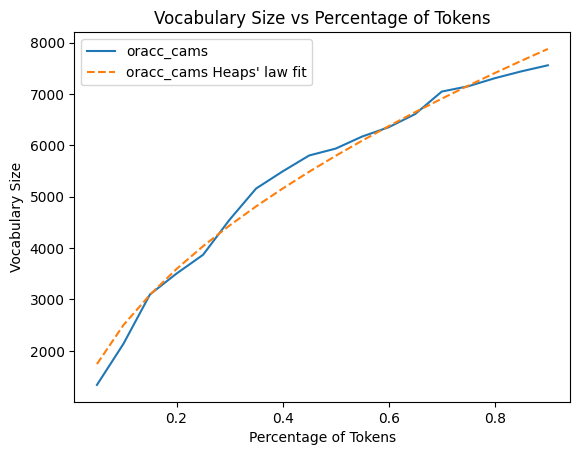

oracc_cams: Heaps' law fit parameters: k=13.20, beta=0.5218, Pearson correlation=0.9930


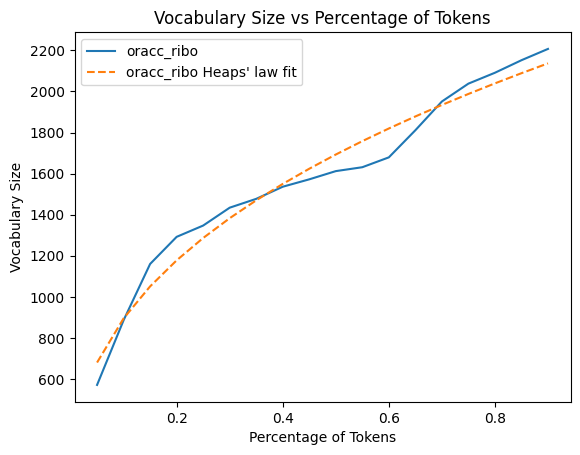

oracc_ribo: Heaps' law fit parameters: k=34.33, beta=0.3961, Pearson correlation=0.9833


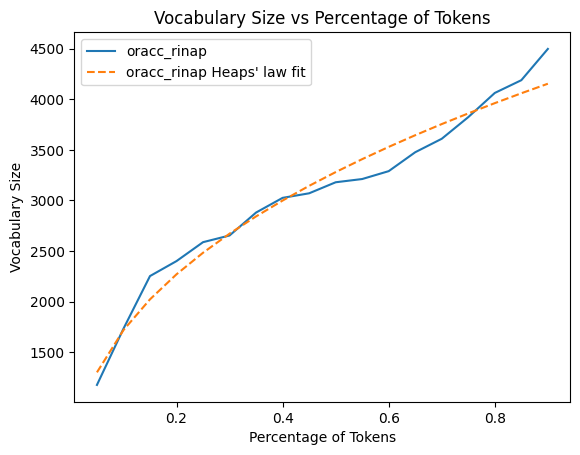

oracc_rinap: Heaps' law fit parameters: k=38.40, beta=0.4016, Pearson correlation=0.9834


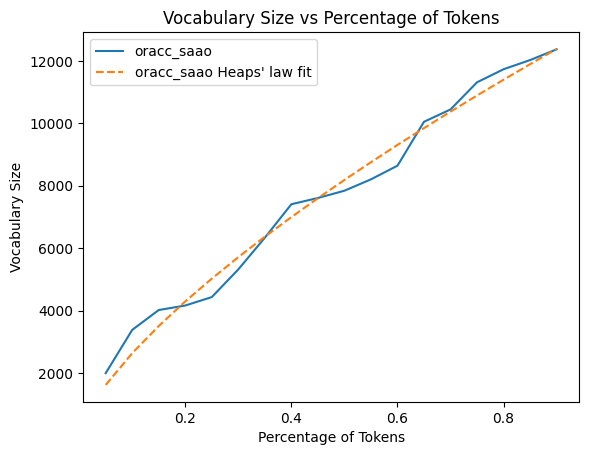

oracc_saao: Heaps' law fit parameters: k=1.35, beta=0.7043, Pearson correlation=0.9922


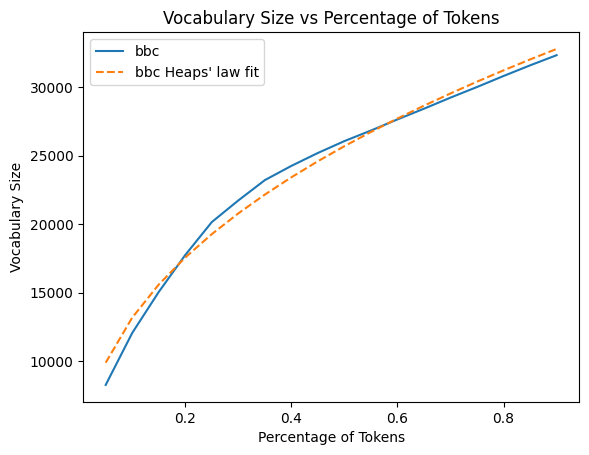

bbc: Heaps' law fit parameters: k=103.47, beta=0.4154, Pearson correlation=0.9946


In [29]:
# graphing the vocabulary sizes against percentages
# also plot Heaps' law curve for comparison
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import pearsonr

k = 100
beta = 0.3

for corpus_name, vocab_sizes in vocabulary_sizes_results.items():
    # fit Heaps' law curve
    heaps_law_fit = curve_fit(heaps_law, [p * len(corpora[corpus_name]) for p in percentages], vocab_sizes, p0=[k, beta])
    fitted_k, fitted_beta = heaps_law_fit[0]
    fitted_vocab_sizes = [heaps_law(p * len(corpora[corpus_name]), fitted_k, fitted_beta) for p in percentages]

    # calculate Pearson correlation coefficient
    correlation, _ = pearsonr(vocab_sizes, fitted_vocab_sizes)

    plt.plot(percentages, vocab_sizes, label=corpus_name)
    plt.plot(percentages, fitted_vocab_sizes, linestyle='--', label=f"{corpus_name} Heaps' law fit")

    plt.xlabel("Percentage of Tokens")
    plt.ylabel("Vocabulary Size")
    plt.title("Vocabulary Size vs Percentage of Tokens")
    plt.legend()
    plt.show()
    print(f"{corpus_name}: Heaps' law fit parameters: k={fitted_k:.2f}, beta={fitted_beta:.4f}, Pearson correlation={correlation:.4f}")

From these results we can see that all of the explored corpora have strong Pearson correlation when vocabulary size is fitted with the percentage of total tokens. Of all the corpora, BBC corpus has most the significant correlation, which can also be observed to have nearly perfect fit with Heaps' law.

## 5

In [30]:
corpuses = {
    "oracc_cams": stemmed_corpora["oracc_cams"],
    "oracc_ribo": stemmed_corpora["oracc_ribo"],
    "oracc_rinap": stemmed_corpora["oracc_rinap"],
    "oracc_saao": stemmed_corpora["oracc_saao"],
    "bbc": stemmed_bbc_tokens
}

In [31]:
from nltk.probability import FreqDist

def calculate_word_frequencies(corpus):
    freq_dist = FreqDist(corpus)
    return freq_dist

In [32]:
freq_dists = {}
for corpus_name, corpus in corpora.items():
    freq_dist = calculate_word_frequencies(corpus)
    freq_dists[corpus_name] = freq_dist
    print(f"Top 10 words in {corpus_name}: {freq_dist.most_common(10)}")

Top 10 words in oracc_cams: [('the', 18361), ('of', 9994), ('and', 6596), ('a', 5684), ('is', 4227), ('will', 4101), ('if', 3938), ('in', 3853), ('it', 3472), ('to', 3317)]
Top 10 words in oracc_ribo: [('the', 3488), ('of', 2436), ('and', 1668), ('god', 857), ('king', 784), ('to', 629), ('hi', 620), ('i', 544), ('in', 508), ('who', 496)]
Top 10 words in oracc_rinap: [('the', 11467), ('of', 8084), ('and', 6434), ('i', 4069), ('my', 2064), ('to', 1920), ('in', 1914), ('king', 1744), ('citi', 1593), ('a', 1533)]
Top 10 words in oracc_saao: [('the', 43752), ('of', 24010), ('and', 13792), ('to', 11921), ('king', 11595), ('my', 9333), ('lord', 9003), ('in', 7893), ('a', 5661), ('i', 5556)]
Top 10 words in bbc: [('the', 53389), ('to', 28814), ('in', 25493), ('of', 23041), ('a', 22902), ("'s", 18442), ('and', 18228), ('for', 11739), ('on', 11061), ('is', 9742)]


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.969
Model:                            OLS   Adj. R-squared:                  0.969
Method:                 Least Squares   F-statistic:                 2.473e+05
Date:                Mon, 27 Oct 2025   Prob (F-statistic):               0.00
Time:                        20:02:56   Log-Likelihood:                -798.06
No. Observations:                7875   AIC:                             1600.
Df Residuals:                    7873   BIC:                             1614.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.3100      0.024    547.274      0.0

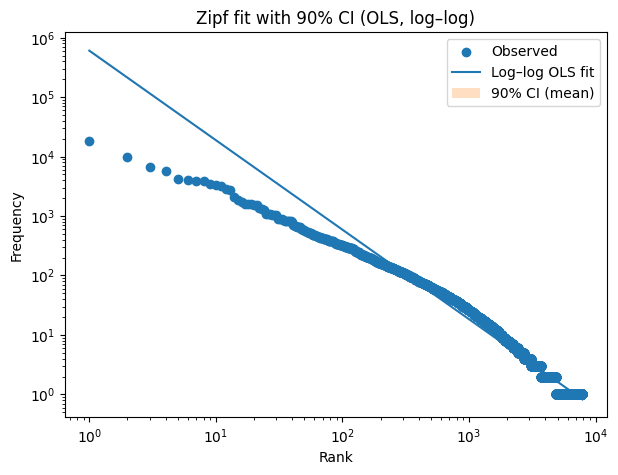

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                 6.543e+04
Date:                Mon, 27 Oct 2025   Prob (F-statistic):               0.00
Time:                        20:02:57   Log-Likelihood:                -80.734
No. Observations:                2383   AIC:                             165.5
Df Residuals:                    2381   BIC:                             177.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.2107      0.035    288.305      0.0

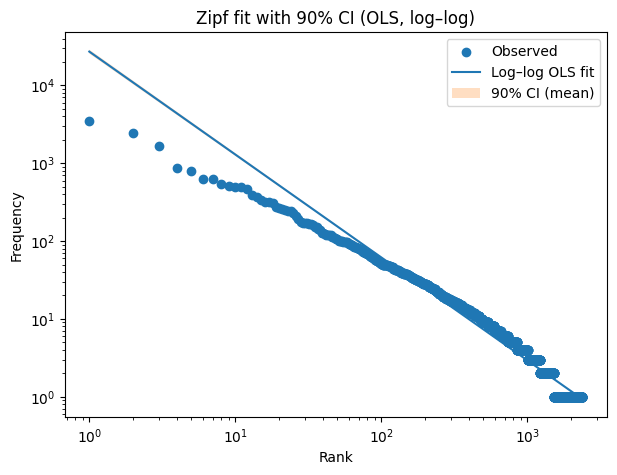

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                 9.594e+04
Date:                Mon, 27 Oct 2025   Prob (F-statistic):               0.00
Time:                        20:02:57   Log-Likelihood:                -1300.4
No. Observations:                4702   AIC:                             2605.
Df Residuals:                    4700   BIC:                             2618.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.3046      0.035    349.832      0.0

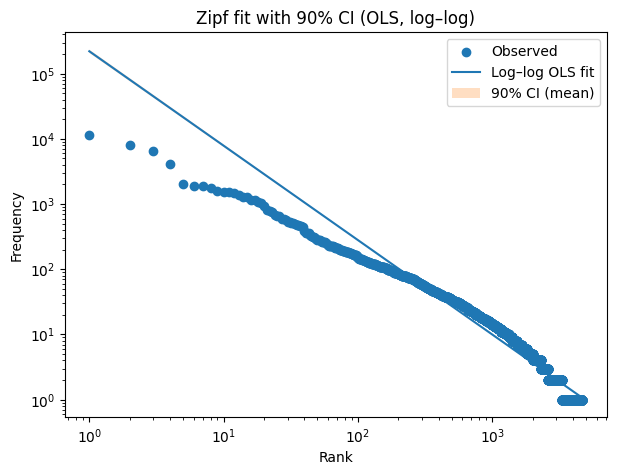

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                 5.394e+05
Date:                Mon, 27 Oct 2025   Prob (F-statistic):               0.00
Time:                        20:02:57   Log-Likelihood:                 615.93
No. Observations:               13148   AIC:                            -1228.
Df Residuals:                   13146   BIC:                            -1213.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.6735      0.017    793.179      0.0

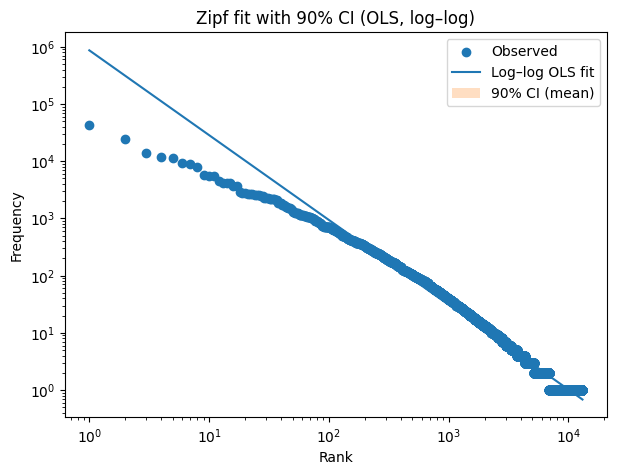

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                 1.386e+06
Date:                Mon, 27 Oct 2025   Prob (F-statistic):               0.00
Time:                        20:02:58   Log-Likelihood:                 678.12
No. Observations:               33902   AIC:                            -1352.
Df Residuals:                   33900   BIC:                            -1335.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         15.5943      0.012   1275.213      0.0

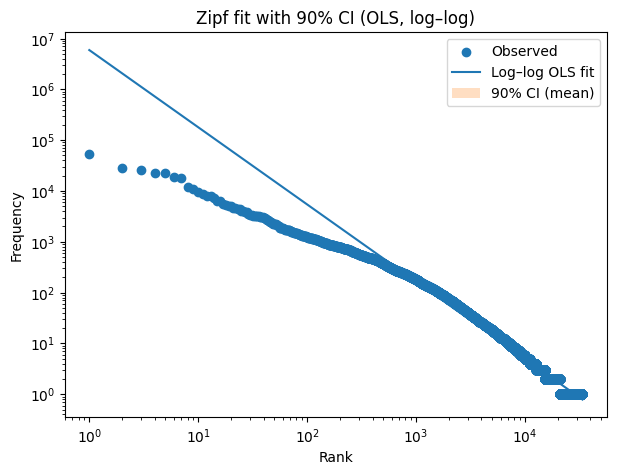

In [45]:
# for each corpus, plot the frequency and rank of words (Zipf's law)
from scipy import stats
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

for corpus_name, freq_dist in freq_dists.items():
    # get frequencies and ranks
    frequencies = np.array(sorted(freq_dist.values(), reverse=True))
    ranks = np.array(range(1, len(frequencies) + 1))

    n_values = np.array(ranks)
    V_values = np.array(frequencies)

    # take logs
    log_r = np.log(ranks)
    log_f = np.log(frequencies)

    # add constant for intercept
    X = sm.add_constant(log_r)
    model = sm.OLS(log_f, X).fit()

    print(model.summary())  # optional: inspect coefficients, p-values, etc.

    # Predict on a smooth rank grid and get 90% CI for the mean prediction
    r_grid = np.linspace(ranks.min(), ranks.max(), 200)
    X_grid = sm.add_constant(np.log(r_grid))
    pred = model.get_prediction(X_grid)
    pred_df = pred.summary_frame(alpha=0.10)  # 90% CI => alpha=0.10

    # Extract predicted log-mean and CI, then exponentiate back to original scale
    log_mean = pred_df['mean']
    log_ci_lower = pred_df['mean_ci_lower']
    log_ci_upper = pred_df['mean_ci_upper']

    mean_pred = np.exp(log_mean)
    ci_lower = np.exp(log_ci_lower)
    ci_upper = np.exp(log_ci_upper)

    # Plot original data and fit + 90% CI (log-log plotting)
    plt.figure(figsize=(7,5))
    plt.scatter(ranks, frequencies, label='Observed', zorder=5)
    plt.plot(r_grid, mean_pred, label='Log–log OLS fit', zorder=4)
    plt.fill_between(r_grid, ci_lower, ci_upper, alpha=0.25, label='90% CI (mean)', zorder=3)
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('Rank')
    plt.ylabel('Frequency')
    plt.title("Zipf fit with 90% CI (OLS, log–log)")
    plt.legend()
    plt.show()


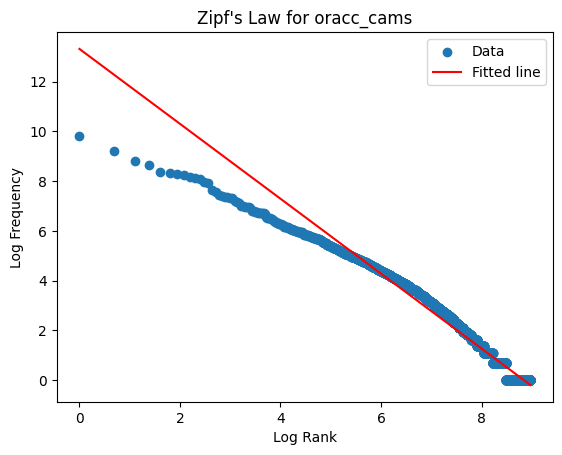

oracc_cams: slope=-1.5053, intercept=13.3100, r-squared=0.9691, p-value=0.0000


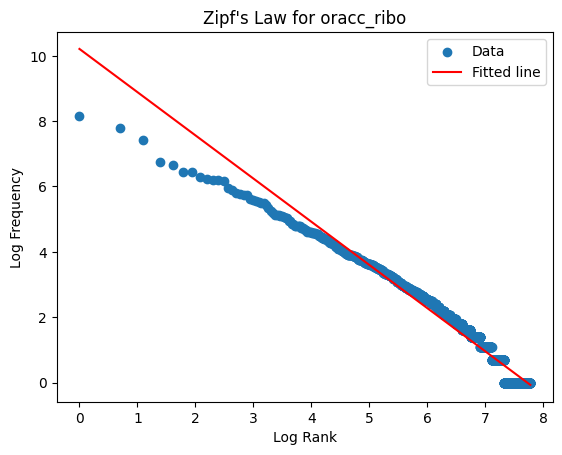

oracc_ribo: slope=-1.3225, intercept=10.2107, r-squared=0.9649, p-value=0.0000


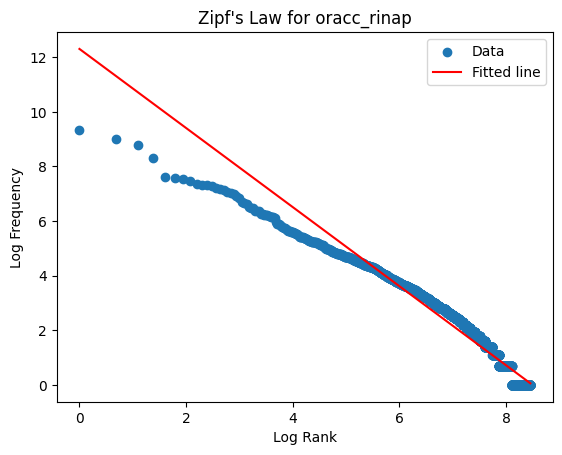

oracc_rinap: slope=-1.4481, intercept=12.3046, r-squared=0.9533, p-value=0.0000


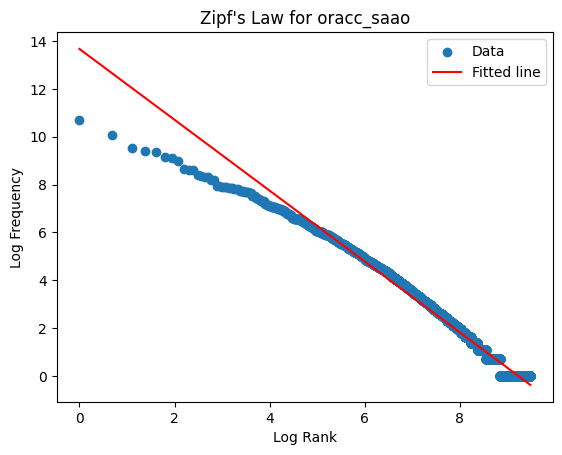

oracc_saao: slope=-1.4820, intercept=13.6735, r-squared=0.9762, p-value=0.0000


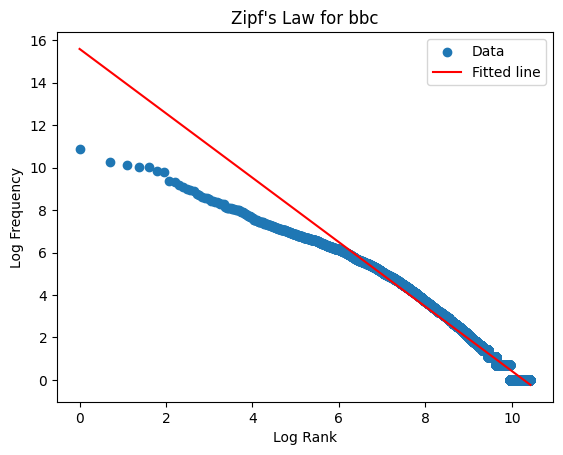

bbc: slope=-1.5180, intercept=15.5943, r-squared=0.9761, p-value=0.0000


In [206]:
# for each corpus, plot the frequency and rank of words (Zipf's law), and examine whether a linear fit can be accommodated with 90% confidence
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
from scipy import stats

for corpus_name, freq_dist in freq_dists.items():
    freqs = np.array([freq for word, freq in freq_dist.most_common()])
    ranks = np.arange(1, len(freqs) + 1)

    log_ranks = np.log(ranks)
    log_freqs = np.log(freqs)

    slope, intercept, r_value, p_value, std_err = linregress(log_ranks, log_freqs)

    plt.figure()
    plt.scatter(log_ranks, log_freqs, label='Data')
    plt.plot(log_ranks, intercept + slope * log_ranks, 'r', label='Fitted line')

    plt.xlabel('Log Rank')
    plt.ylabel('Log Frequency')
    plt.title(f"Zipf's Law for {corpus_name}")
    plt.legend()
    plt.show()

    print(f"{corpus_name}: slope={slope:.4f}, intercept={intercept:.4f}, r-squared={r_value**2:.4f}, p-value={p_value:.4f}")